# Лабораторная работа 2

### Задачи

### Установка pytorch

In [1]:
import torch
import numpy as np

In [2]:
# numpy 

x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch 

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')

X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


### NumPy

In [5]:
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Leaf vs Non-leaf Variable:

In [7]:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)  # leaf tensor
y = x + 1  # not a leaf variable

In [8]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)
    
# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


### Пример линейной регрессии на датасете California

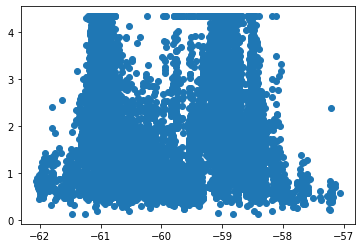

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);

In [10]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


In [11]:
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 tensor([214.0627])
dL/db = 
 tensor([-3.5852])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


C:\Users\Mvideo\AppData\Local\Temp\ipykernel_21528\3846789532.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


### Градиенты промежуточных вершин

In [12]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0004, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0003, -0.0002,
        -0.0002, -0.0002])


### Линейная регрессия

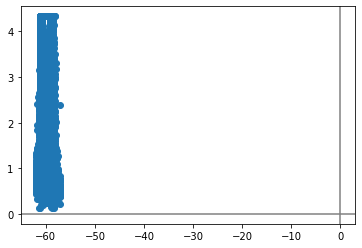

loss =  nan


In [13]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Assuming w and b are already defined

alpha = 0.1  # learning rate

for i in range(100):
    # compute loss
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # backpropagation
    loss.backward()
    
    # gradient descent step for weights and bias
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    # zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

### Оптимизаторы

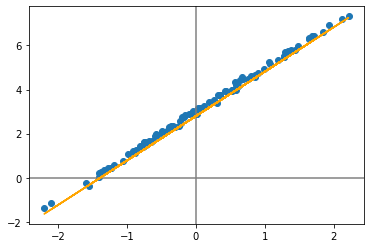

loss =  0.050856202840805054
Done!


In [17]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch

# Generate synthetic data for linear regression
torch.manual_seed(42)
x = torch.randn(100)  # Random input
y = 2 * x + 3 + 0.1 * torch.randn(100)  # Linear relationship with noise

# Model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    # Compute predictions
    y_pred = w * x + b
    
    # Compute loss
    loss = torch.mean((y_pred - y)**2)
    
    # Backpropagation and gradient descent
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    # The rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # Draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.1:
            print("Done!")
            break

### Высокоуровневые API

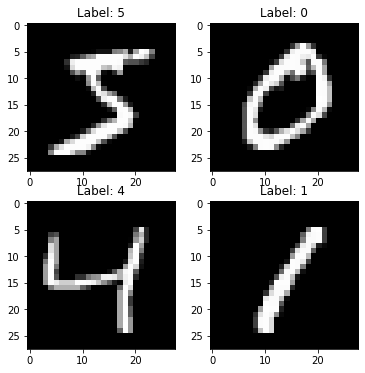

In [18]:
# MNIST 
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [19]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly

In [28]:
import numpy as np

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

    def forward(self, x):
        return x

model = Net()

# Forward pass with the model
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)

# Obtain probabilities using log_softmax
probs = F.log_softmax(output, dim=1)
print('Probs: \n', probs)

# Obtain predictions using argmax
pred = torch.argmax(output, dim=1)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Probs: 
 tensor([[-6.8610, -6.8610, -6.8610,  ..., -6.8610, -6.8610, -6.8610],
        [-6.8844, -6.8844, -6.8844,  ..., -6.8844, -6.8844, -6.8844],
        [-6.8022, -6.8022, -6.8022,  ..., -6.8022, -6.8022, -6.8022],
        ...,
        [-6.9170, -6.9170, -6.9170,  ..., -6.9170, -6.9170, -6.9170],
        [-6.7464, -6.7464, -6.7464,  ..., -6.7464, -6.7464, -6.7464],
        [-6.8224, -6.8224, -6.8224,  ..., -6.8224, -6.8224, -6.8224]])
Pred: 
 [161 272 578 160 490 407 125 154 238 272]
Truth: 
 [5 0 4 1 9 2 1 3 1 4]


In [29]:
from IPython.display import clear_output
from tqdm.auto import tqdm

# функция для итераций по минибатчам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

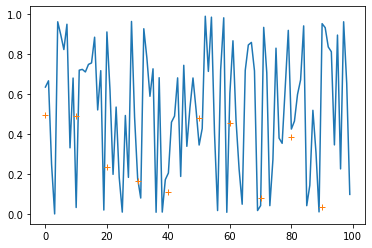

In [34]:
import matplotlib.pyplot as plt

x = np.arange(100)
y = np.random.random_sample(len(x))
x1 = x[::10]
y1 = np.random.random_sample(len(x1)) / 2

plt.figure()

plt.plot(x, y)
plt.plot(x1, y1, '+')

plt.show()

In [36]:
import matplotlib.pyplot as plt

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.plot(train_history, label='Train ' + title)
    plt.plot(val_history, label='Validation ' + title)
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.title('Training and Validation ' + title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 1)  # Example linear layer with input size 10 and output size 1

    def forward(self, x):
        return self.fc(x)
